# Numerical Derivatives

The derivative $f'(x)$ of a function $f(x)$ of a single variable x is the rate at which the
value of $f(x)$ changes at x. Graphically, it is the slope of the tangent line of $f(x)$ at a given value of $x$.

[//]: # "How could we use information of the slope to find the $x$ that maximizes the function (i.e., the optimal $x$)? Based on the graph, we may find that the following two observations are generally true for a nicely concave function $f(x)$.
- If the slope at the current point $x=x0$ is positive, the optimal $x$ should be larger than $x0$.
  - It means we need to make a positive step to move to the optimal. It tells use the direction of _steepest ascent_.
- If the size of the slope (i.e., $|slope|$) at the current point $x=x0$ is large (steep), then, generally speaking, the point is far away from the optimal point."




### First Derivatives

Consider a continuous function $f(x)$ which is (twice) differentiable. Suppose we want to know the derivative of $f(x)$ at the value of $x=x_0$. We write it as $f'(x=x_0)$, or, more simply, $f'(x_0)$. The limit equation defining the derivative is:

\begin{equation}
 f'(x_0) = \frac{df}{dx} \vert_{x=x0} = \lim_{h \rightarrow 0} \frac{f(x_0+h) - f(x_0)}{h}.
\end{equation}

The notation implies that, in theory, $h$ should be as small as possible. 


###### Example

Consider the following function:

\begin{equation}
 f(x) = -\frac{1}{2}x^2 + 20,
\end{equation}

for which the 1st derivative is

\begin{equation}
 f'(x) = -x.
\end{equation}

Let's consider the case $f'(x=-4)$. 

In [1]:
using Interact, WebIO, Plots
using Symbolics, Printf 

@variables x

f(x) = -(1/2)x^2 + 20

Symbolics.derivative(f(x),x) |> display

WebIO._IJuliaInit()

-x

In [6]:
Base.show(io::IO, f::Float64) = @printf(io, "%.4f", f) # control the shown digits

@manipulate for h = 1e-9:0.1:9 
    
    f(x) = -(1/2)x^2 + 20
    mysec1(x, x0, h) = ((f(x0+h)-f(x0))/h) * (x-x0) + f(x0) # hjw
    f_sec(x::Float64) = mysec1(x,x0,h) # hjw
    
    x0 = -4.0      
    
    plot(size=(600,400))      
    plot!(f, xlims=[-12,12], ylims = [8,25] , aspect_ratio = 1, label="f(x)", linewidth=2) # main curve   
    plot!(f_sec, label="secant line")      
    scatter!([x0], [f(x0)], label=false)      # intersection x0      
    scatter!([x0+h], [f(x0+h)], label=false)  # intersection b    
    plot!([x0,x0+h], [f(x0)<f(x0+h) ? f(x0) : f(x0+h), f(x0)<f(x0+h) ? f(x0) : f(x0+h)], ls=:dash, color=:darkred, label=false)
    plot!([f(x0)<f(x0+h) ? x0+h : x0, f(x0)<f(x0+h) ? x0+h : x0], [f(x0),f(x0+h)], ls=:dash, color=:darkred, label=false)   
    quiver!([x0+h/2], [f(x0)<f(x0+h) ? f(x0)-3 : f(x0+h)-3], quiver=([0],[3]), color=:darkred)    
    quiver!([f(x0)<f(x0+h) ? x0+h+3 : x0-3], [(f(x0)+f(x0+h))/2-2], quiver=([f(x0)<f(x0+h) ? -3 : 3],[2]), color=:darkred)    
    annotate!([x0+h/2], [f(x0)<f(x0+h) ? f(x0)-3.5 : f(x0+h)-3.5],  text("h=$(h)", 9))    
    annotate!([f(x0)<f(x0+h) ? x0+h+3 : x0-3], [(f(x0)+f(x0+h))/2-2.5], text("f(x+h)-f(x) = $(f(x0+h)-f(x0)) ",9))     
    annotate!(x0-1, f(x0), text("($x0,$(f(x0)))", :orange, :right, 9))    
    annotate!(x0+h+1, f(x0+h), text("$((x0+h,f(x0+h)))", :purple, :left, 9))   
    quiver!([x0+h+1-3], [f_sec(x0+h+1)+2], quiver=([3],[-2]))
    annotate!(x0+h+1-3, f_sec(x0+h+1)+2.5, text("slope=$((f(x0+h)-f(x0))/h)", :red, 9)) 
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["h"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 90, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(45), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\mymis\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\mymis\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\mymis\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\mymis\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\mymis\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000029e5c131560, Task (runnable) @0x0000029e5c131560), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, 2879189676400, 2879169325488)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0000\",\"0.1000\",\"0.2000\",\"0.3000\",\"0.4000\",\"0.5000\",\"0.6000\",\"0.

The above graph looks nice, right? It seems the result is accurate: When the $h$ is small, we get the correct value of the slope which is 4. However, the result looks good only because we have rounded the numbers. That is, the value of the slope, if you look closely enough, is not exactly 4. We now study the numerical issues of the approximation.

### The numerical approximation using finite differences

The limit equation may be straightforwardly implemented using the _**forward difference**_ formula to which the error term is $O(h)$ (i.e., the error of the formula is proportional to $h$ as $h$ approaches 0):

\begin{equation}
 f'(x_0) \approx \frac{f(x_0+h) - f(x_0)}{h}\quad \mbox{ for a small $h$}.\label{eq:approx1}
\end{equation}

Compared to the (theoretical) limit equation, the numerical implementation has some important differences.

- The forward difference formula is not the most accurate formula to approximate the derivatives.

- When implementing the numerical approximation in computers, it is not always true that the ever-smaller $h$ is better. In fact, choosing the appropriate size of $h$ is very important for numerical derivatives.

In [4]:
# Let's see how the choice of h may affect the results.

Base.show(io::IO, f::Float64) = @printf(io, "%.16f", f) 


x0 = 2

f(x) = exp(x)                          # df(x)/dx = f(x) in the case of an exponential function
f_d1_true(x) = f(x)
f_d1_forward(x, h) = (f.(x .+ h) .- f.(x)) ./h                # numerical derivative 
f_d1_forward_error(x, h) = f_d1_forward(x,h) .- f_d1_true(x)  # approximation error

#=
f(x) = 3x^2 + log(x^2) 
f_d1_true(x) = 6x + 2/x
f_d1_forward(x,h) = (f.(x .+ h) .- f.(x)) ./h  # numerical derivative 
f_d1_forward_error(x,h) = f_d1_forward(x,h) .- f_d1_true(x)    # approximation error
=#

ϵ = sqrt(eps(one(eltype(1.0))))  # square-root of machine precision

h_list = [1e-4, 1e-5, 1e-6, 1e-7, ϵ, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14]


function test1(x, grid)
    res = zeros(length(grid),3)
    res[:,1] = grid
    res[:,2] = f_d1_forward(x, grid)
    res[:,3] = f_d1_forward_error(x, grid)   
    return res   
end   

test1(x0, h_list) 

LoadError: LoadError: UndefVarError: `@printf` not defined
in expression starting at /Users/xiang/Library/CloudStorage/GoogleDrive-xiang001126turkey@gmail.com/我的雲端硬碟/NTU_course/112Spring/01_經濟計量數值方法導論/lecturenotes/Lec9 Numerical Finite Differences.ipynb:3

In [3]:
# using Julia's packages

#using FiniteDifferences, 
using ForwardDiff

#julia_finite_error = central_fdm(5, 1)(f, x0) - f_d1_true(x0)  # numerical derivatives
#@show julia_finite_error

julia_AD_error = ForwardDiff.derivative(f, x0) - f_d1_true(x0)  # automatic differentiation
@show julia_AD_error

# exercise: write a program which shows the "best" h for a given value of x. E.g., 1e-8 for exp(2).

UndefVarError: UndefVarError: `f` not defined

We saw several things from the naive example above.

1. $h$ should not be too small or too large.


2. Using naive methods, the best $h$ may change if we change the value in the $\exp(.)$ function. 

  - For $\exp(2)$, $h=$1e-8 seems better.

  - For $\exp(10)$, $h=$1e-7 seems better.


3. As a rule of thumb, the accuracy usually improves if we set `h` to be half of the machine precision, `sqrt(eps(one(eltype(1.0)))) = 1.4901161193847656e-8`.


4. In the best scenario of numerical approximations (e.g., Julia's `FiniteDifferences` package), the numerical approximation is only about half as accurate, in the sense that, for the `Float64` data type, only the first 8 digits out of the total 16 digits are accurate. If use `Float32` data type, only the first 4 digits would be accurate.

> `Float32` stores 8 decimal digits and `Float64` stores 16 decimal digits.

The first point may seem surprising, because in theory `h` should be infinitely small. In this case, the loss of accuracy from small `h` arises because of the finite precision of computers in representing numbers. The issue occurs when the values of $f(x+h)$ and $f(x)$ are very close to each other, which can lead to numerical instability and rounding errors when subtracting one from the other. Specifically, when `h` is set to a very small value, such as 1e-14, the difference between $f(x+h)$ and $f(x)$ becomes very small, which can result in a loss of precision due to the rounding errors when subtracting two very similar numbers. As a result, the approximation can lose significant digits, leading to a decrease in the accuracy of the derivative approximation. 

The lesson here is that knowing the math is one thing, understanding how to implement it in computer languages is quite another thing which is also of great importance.

To get the best $h$, it may be desirable to adjust the value dynamically. There are many ways to do so. Nash (1990) suggested choosing $h$ so that **$x+h$ should differ from $x$ in at least half of its digits**. He proposed the following formula:
\begin{equation}
  h(x) = \epsilon\times (|x| + \epsilon),
\end{equation}
  where $\epsilon$ is the square root of machine precision. The machine precision is roughly 2e-16 for `Float64`. More specifically, in Julia the machine precision is `e=eps(one(eltype(1.0)))=2.220446049250313e-16`, and so the square root of the machine precision is `e_root=sqrt(eps(one(eltype(1.0))))=1.4901161193847656e-8`. So, for taking derivatives on $\exp(2)$, the suggested $h$ is $h(2) =  e\_root \times (2 + e\_root)$. For $\exp(10)$, the suggested $h$ is $h(10) =  e\_root \times (10 + e\_root)$. Note that this is a general rule which may not be the best rule for all the equations of all the values.


In addition to choosing a better $h$, the equation based on which the difference is calculated would also matter. In this regard, the _**central difference**_ formula has better precision (compared to the forward difference formula in \eqref{eq:der1}). Its error term is $O(h^2)$ (i.e., the error is proportional to $h^2$):

\begin{equation}
 f'(x_0) \approx \frac{f(x_0+h/2) - f(x_0 - h/2)}{h}\quad \mbox{ for a small $h$}.\label{eq:der1}
\end{equation}


There are many computer softwares that do numerical optimizations (which rely heavily on numerical details) . The _mathematical_ optimization algorithms are common knowledge, but you'll find that some softwares do a better job than others in using the algorithms to solve optimization problems -- more robust, stable, and accurate. The secret is often in the numerical details. That is, given the same mathematical algorithms, how well does the software translates it into computer algorithms by taking care of the numerical details. In the current example, the secret is in choosing a suitable value of $h$.

### Second Derivatives

The second derivative captures the curvature of the function. An easy way to think of the calculation of the second derivative is that we take derivatives on the first derivative. Thus,

\begin{equation}
f''(x) \approx \frac{f'(x + h/2) - f'(x - h/2)}{h}. \label{eq:der2a}
\end{equation}

Substituting the approximation function of $f'(x)$ in \eqref{eq:der1} into the above equation, we have

\begin{equation}
f''(x) \approx \frac{f(x + h) - 2f(x) + f(x - h)}{h^2}. \label{eq:der2b}
\end{equation}

Note that if $f'(x)$ is calculated to half accuracy, $f''(x)$ would be also calculated to half accuracy. That is, there is no further loss of accuracy.





### Gradient and Hessian: Derivatives in Multiple Dimensions

The gradient is the generalization of the derivative to multivariate functions. It captures the local slope of the function, allowing us to predict the effect of taking a small step from a point in any direction. Similar to the derivative in the case of a uni-variate variable, the gradient of a multivariate function tells us the direction of steepest ascent of the tangent hyperplane on the function.

Suppose $f(\mathbf X)$ is a multivariate function where $\mathbf{X}= (X_1, X_2, \ldots, X_n)$ is a vector of variables. The gradient of $f(\mathbf X)$ at $\mathbf x$ is written as $\nabla f(\mathbf x)$ and is a vector:

\begin{equation}
 \nabla f(\mathbf x) = \left[\frac{\partial f(\mathbf x)}{\partial x_1}, \frac{\partial f(\mathbf x)}{\partial x_2}, \ldots, \frac{\partial f(\mathbf x)}{\partial x_n} \right]. 
\end{equation}

Each of the components is a partial derivative with respect to a variable in the $\mathbf X$ vector. Following Julia's notation, we treat $\nabla f(\mathbf x)$ as a column vector.

The _Hessian_ of a multivariate function is a $n \times n$ matrix containing all of the second derivatives with respective to the variables in $\mathbf X$.

\begin{equation}
\nabla^2 f(\mathbf x) = 
\begin{bmatrix}
\frac{\partial^2 f(\mathbf x)}{\partial x_1 \partial x_1} & \frac{\partial^2 f(\mathbf x)}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f(\mathbf x)}{\partial x_1 \partial x_n} \\
 & \vdots &  &  \\
\frac{\partial^2 f(\mathbf x)}{\partial x_n \partial x_1} & \frac{\partial^2 f(\mathbf x)}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f(\mathbf x)}{\partial x_n \partial x_n} 
\end{bmatrix}.
\end{equation}

### Here are some rules of differentiations.


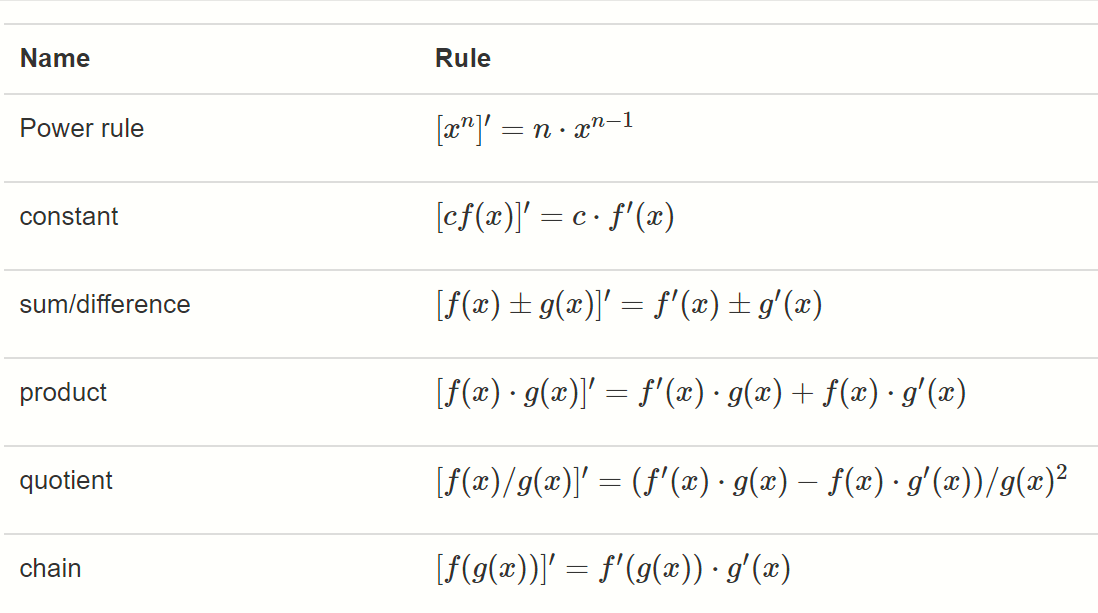

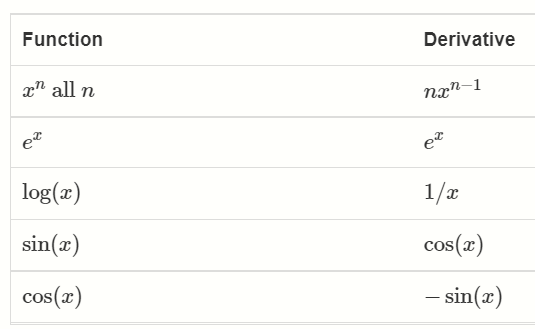